# Разведочный анализ данных

## Импорт библиотек

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

## Загрузка данных

In [116]:
D_clients = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/clients/D_clients.csv")
D_close_loan = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/clients/D_close_loan.csv")
D_job = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/clients/D_job.csv")
D_last_credit = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/clients/D_last_credit.csv")
D_loan = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/clients/D_loan.csv")
D_pens = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/clients/D_pens.csv")
D_salary = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/clients/D_salary.csv")
D_target = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/clients/D_target.csv")
D_work = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/clients/D_work.csv")

## Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.

In [5]:
D_clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,Чувашия,Чувашия,0,0
15996,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,Карелия,Карелия,0,0
15997,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,Белгородская область,Белгородская область,0,0
15998,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.

In [6]:
D_work

,ID,FLAG,COMMENT
0,1,0,работает
1,2,1,не работает
2,3,2,не известно


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.

In [7]:
D_pens

,ID,FLAG,COMMENT
0,1,0,пенсионер
1,2,1,не пенсионер


**D_target**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).

In [8]:
D_target

,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0
...,...,...,...
15218,75291424,106819588,0
15219,75291888,106819589,0
15220,75291923,106819590,0
15221,75291960,106819591,0


**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.

In [9]:
D_job

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374
...,...,...,...,...,...
15218,Строительство,Специалист,Участие в основ. деятельности,48.0,106819588
15219,Здравоохранение,Другое,Участие в основ. деятельности,156.0,106819589
15220,Торговля,Служащий,Кадровая служба и секретариат,48.0,106819590
15221,NaN,NaN,NaN,NaN,106819591


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).

In [10]:
D_salary

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620
...,...,...,...
15518,от 20000 до 50000 руб.,15000.0,106812538
15519,от 10000 до 20000 руб.,12000.0,106814158
15520,от 10000 до 20000 руб.,14000.0,106805134
15521,от 10000 до 20000 руб.,7000.0,106812867


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).

In [11]:
D_last_credit

,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
0,8000.00,6,8650.0,106804370
1,21650.00,6,4000.0,106804371
2,33126.00,12,4000.0,106804372
3,8491.82,6,5000.0,106804373
4,21990.00,12,4000.0,106804374
...,...,...,...,...
15218,13450.00,10,1500.0,106819588
15219,8991.00,6,4000.0,106819589
15220,2700.00,6,800.0,106819590
15221,24357.00,10,17930.0,106819591


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

In [12]:
D_loan

,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373
...,...,...
21121,1753811779,106819588
21122,1753811780,106819589
21123,1753811781,106819590
21124,1753811782,106819591


**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

In [13]:
D_close_loan

,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1
...,...,...
21121,1753811779,1
21122,1753811780,0
21123,1753811781,0
21124,1753811782,0


Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

**Объединим D_clients и D_target**

In [117]:
D_clients = pd.merge(D_clients, D_target, left_on='ID', right_on='ID_CLIENT')
D_clients = D_clients.drop('ID_CLIENT', axis=1)

**Объединим D_clients и D_job**

In [118]:
D_clients = pd.merge(D_clients, D_job, left_on='ID', right_on='ID_CLIENT')
D_clients = D_clients.drop('ID_CLIENT', axis=1)

**Объединим D_clients и D_salary**

In [119]:
D_clients = pd.merge(D_clients, D_salary, left_on='ID', right_on='ID_CLIENT')
D_clients = D_clients.drop('ID_CLIENT', axis=1)

**Объединим D_last_credit и D_clients**

In [120]:
D_clients = pd.merge(D_clients, D_last_credit, left_on='ID', right_on='ID_CLIENT')
D_clients = D_clients.drop('ID_CLIENT', axis=1)

**Объединим D_loan, D_close_loan и D_clients**

In [121]:
merged_df = pd.merge(D_loan, D_close_loan, on='ID_LOAN', how='left')

grouped_df = merged_df.groupby('ID_CLIENT').agg(LOAD_NUM_TOTAL=('ID_LOAN', 'count'),
                                                LOAN_NUM_CLOSED=('CLOSED_FL', 'sum')).reset_index()

result_df = grouped_df[['ID_CLIENT', 'LOAD_NUM_TOTAL', 'LOAN_NUM_CLOSED']]

In [122]:
D_clients = pd.merge(D_clients, result_df, left_on='ID', right_on='ID_CLIENT')
D_clients = D_clients.drop('ID_CLIENT', axis=1)

In [123]:
y = D_clients["TARGET"]
D_clients = D_clients.drop(columns=["TARGET"])
D_clients = pd.concat([D_clients, y], axis=1)

D_clients = D_clients.drop('ID', axis=1)

y = D_clients["AGREEMENT_RK"]
D_clients = D_clients.drop(columns=["AGREEMENT_RK"])
D_clients = pd.concat([y, D_clients], axis=1)

**Итоговый список колонок:**

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - AGE — возраст клиента;
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - EDUCATION — образование;
    - MARITAL_STATUS — семейное положение;
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - REG_ADDRESS_PROVINCE — область регистрации клиента;
    - FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
    - POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
    - FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
    - OWN_AUTO — количество автомобилей в собственности;
    - GEN_INDUSTRY — отрасль работы клиента;
    - GEN_TITLE — должность;
    - JOB_DIR — направление деятельности внутри компании;
    - WORK_TIME — время работы на текущем месте (в месяцах);
    - FAMILY_INCOME — семейный доход (несколько категорий);
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - CREDIT — сумма последнего кредита клиента (в рублях);
    - TERM — срок кредита;
    - FST_PAYMENT — первоначальный взнос (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента;

    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений числовых признаков (не менее, чем по двум признакам)
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков (не менее, чем два графика)
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* вычислены числовые характеристики категориальных столбцов
* отображено число пропусков, дубликатов в данных
* любые другие ваши идеи приветствуются!


[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

eda.ipynb - ноутбук с исследованием

eda.py - выносим первичный анализ в отдельные функции

app.py - реализуем веб сервис

README.md - описание проекта

### **Исследование данных**

Посмотрим на размер датасета

In [124]:
df = D_clients.copy()
df.shape

(15523, 26)

Посмотрим на типы данных и пропуски

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15523 entries, 0 to 15522
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGREEMENT_RK             15523 non-null  int64  
 1   AGE                      15523 non-null  int64  
 2   GENDER                   15523 non-null  int64  
 3   EDUCATION                15523 non-null  object 
 4   MARITAL_STATUS           15523 non-null  object 
 5   CHILD_TOTAL              15523 non-null  int64  
 6   DEPENDANTS               15523 non-null  int64  
 7   SOCSTATUS_WORK_FL        15523 non-null  int64  
 8   SOCSTATUS_PENS_FL        15523 non-null  int64  
 9   REG_ADDRESS_PROVINCE     15523 non-null  object 
 10  FACT_ADDRESS_PROVINCE    15523 non-null  object 
 11  POSTAL_ADDRESS_PROVINCE  15523 non-null  object 
 12  FL_PRESENCE_FL           15523 non-null  int64  
 13  OWN_AUTO                 15523 non-null  int64  
 14  GEN_INDUSTRY          

Видим, что `GEN_INDUSTRY`, `GEN_TITLE`, `JOB_DIR`, `WORK_TIME` содержат пропуски

Посмотрим на основные характеристики числовых признаков:

In [23]:
df.describe()

,AGREEMENT_RK,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,WORK_TIME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,LOAD_NUM_TOTAL,LOAN_NUM_CLOSED,TARGET
count,1.552300e+04,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,1.412500e+04,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000
mean,6.539832e+07,40.400438,0.653997,1.098886,0.644850,0.909360,0.134639,0.309798,0.116279,2.882264e+02,13848.041638,14692.292480,8.105843,3407.078203,1.387296,0.751594,0.119371
std,4.569483e+06,11.607242,0.475709,0.996748,0.812663,0.287105,0.341348,0.462425,0.320771,2.413085e+04,8998.618992,12176.737775,4.095993,5167.898178,0.794241,0.989253,0.324235
min,5.991015e+07,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,24.000000,2000.000000,3.000000,0.000000,1.000000,0.000000,0.000000
25%,6.191984e+07,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.400000e+01,8000.000000,6503.500000,6.000000,1000.000000,1.000000,0.000000,0.000000
50%,6.436952e+07,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.800000e+01,12000.000000,11576.000000,6.000000,2000.000000,1.000000,0.000000,0.000000
75%,6.708832e+07,50.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.100000e+02,17000.000000,19218.000000,10.000000,4000.000000,2.000000,1.000000,0.000000
max,7.529224e+07,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.867959e+06,250000.000000,119700.000000,36.000000,140000.000000,11.000000,11.000000,1.000000


Посмотрим на характеристики категориальных признаков:

In [24]:
df.describe(include='object')

,EDUCATION,MARITAL_STATUS,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,FAMILY_INCOME
count,15523,15523,15523,15523,15523,14126,14126,14126,15523
unique,7,5,81,81,80,31,12,10,5
top,Среднее специальное,Состою в браке,Краснодарский край,Краснодарский край,Краснодарский край,Торговля,Специалист,Участие в основ. деятельности,от 10000 до 20000 руб.
freq,6662,9601,688,688,688,2424,7143,11678,7218


### **Работа с дубликатами**

In [25]:
duplicates_count = df.duplicated().sum()
duplicates_df = pd.DataFrame({'Количество дубликатов': [duplicates_count]})
print(duplicates_df)
print(df.shape)

   Количество дубликатов
0                    300
(15523, 26)


In [26]:
df['AGREEMENT_RK'].value_counts()

66752309    2
67431493    2
66746045    2
62263919    2
67426048    2
           ..
62503051    1
60444155    1
60036186    1
62992351    1
66077514    1
Name: AGREEMENT_RK, Length: 15223, dtype: int64

В датасете есть дубликаты. Посмотрим на их количество

In [27]:
count_by_id = df['AGREEMENT_RK'].value_counts()
k = 0

for id_value, count in count_by_id.items():
  if count > 1:
    k += 1
print(k)

300


In [28]:
len(df[df.duplicated()]['AGREEMENT_RK'].unique())

300

Мы видим 300 дубликатов (строк с одинаковым ID). Отбросим их

In [29]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True, drop = True)

In [30]:
duplicates_count = df.duplicated().sum()
duplicates_df = pd.DataFrame({'Количество дубликатов': [duplicates_count]})
print(duplicates_df)
print(df.shape)

   Количество дубликатов
0                      0
(15223, 26)


### **Работа с пропущенными значениями**

Посмотрим на пропуски (в процентах)

In [31]:
df.isnull().mean() * 100

AGREEMENT_RK               0.000000
AGE                        0.000000
GENDER                     0.000000
EDUCATION                  0.000000
MARITAL_STATUS             0.000000
CHILD_TOTAL                0.000000
DEPENDANTS                 0.000000
SOCSTATUS_WORK_FL          0.000000
SOCSTATUS_PENS_FL          0.000000
REG_ADDRESS_PROVINCE       0.000000
FACT_ADDRESS_PROVINCE      0.000000
POSTAL_ADDRESS_PROVINCE    0.000000
FL_PRESENCE_FL             0.000000
OWN_AUTO                   0.000000
GEN_INDUSTRY               8.979833
GEN_TITLE                  8.979833
JOB_DIR                    8.979833
WORK_TIME                  8.986402
FAMILY_INCOME              0.000000
PERSONAL_INCOME            0.000000
CREDIT                     0.000000
TERM                       0.000000
FST_PAYMENT                0.000000
LOAD_NUM_TOTAL             0.000000
LOAN_NUM_CLOSED            0.000000
TARGET                     0.000000
dtype: float64

In [32]:
series = df.isnull().mean() * 100
filtered_series = series[series > 0]
print(filtered_series)

GEN_INDUSTRY    8.979833
GEN_TITLE       8.979833
JOB_DIR         8.979833
WORK_TIME       8.986402
dtype: float64


Видим, что `GEN_INDUSTRY`, `GEN_TITLE`, `JOB_DIR`, `WORK_TIME` содержат пропуски (9% в каждой колонке). Это не мало. Выберем стратегию заполнения пропусков.

In [33]:
df['GEN_INDUSTRY']

0                  Другие сферы
1                      Торговля
2                  Другие сферы
3        Государственная служба
4                  Другие сферы
                  ...          
15218    Сборочные производства
15219                  Торговля
15220                  Торговля
15221                 Транспорт
15222              Другие сферы
Name: GEN_INDUSTRY, Length: 15223, dtype: object

In [34]:
df['GEN_TITLE']

0              Работник сферы услуг
1                        Специалист
2        Руководитель высшего звена
3                        Специалист
4                        Специалист
                    ...            
15218                    Специалист
15219                    Специалист
15220                    Специалист
15221                    Специалист
15222                       Рабочий
Name: GEN_TITLE, Length: 15223, dtype: object

In [35]:
df['JOB_DIR']

0        Участие в основ. деятельности
1        Участие в основ. деятельности
2        Участие в основ. деятельности
3        Участие в основ. деятельности
4        Участие в основ. деятельности
                     ...              
15218    Участие в основ. деятельности
15219    Участие в основ. деятельности
15220    Участие в основ. деятельности
15221    Участие в основ. деятельности
15222      Вспомогательный техперсонал
Name: JOB_DIR, Length: 15223, dtype: object

In [36]:
df['WORK_TIME']

0          3.0
1          5.0
2        360.0
3          3.0
4         12.0
         ...  
15218     36.0
15219     24.0
15220     36.0
15221     36.0
15222     12.0
Name: WORK_TIME, Length: 15223, dtype: float64

*   `GEN_INDUSTRY` - категориальный столбец
*   `GEN_TITLE` - категориальный столбец
*   `JOB_DIR` - категориальный столбец
*   `WORK_TIME` - числовой столбец

In [37]:
print(df['WORK_TIME'].mean())
print(df['WORK_TIME'].median())

292.21198123421146
48.0


Числовой столбец `WORK_TIME` содержт выбросы, поэтому заполним его медианой. Категориальные столбцы заполним самым часто встречающимся значением.

Стратегия заполнения пропусков:

*   `GEN_INDUSTRY` - заполним самым часто встречающися значением
*   `GEN_TITLE` - заполним самым часто встречающися значением
*   `JOB_DIR` - заполним самым часто встречающися значением
*   `WORK_TIME` заполним медианой

In [38]:
df['GEN_INDUSTRY'].fillna(df['GEN_INDUSTRY'].mode()[0], inplace=True)
df['GEN_TITLE'].fillna(df['GEN_TITLE'].mode()[0], inplace=True)
df['JOB_DIR'].fillna(df['JOB_DIR'].mode()[0], inplace=True)

In [39]:
median_WT = df['WORK_TIME'].median()
df['WORK_TIME'].fillna(median_WT, inplace=True)

Убедимся, что мы сделали всё правильно

In [40]:
df.isnull().mean() * 100

AGREEMENT_RK               0.0
AGE                        0.0
GENDER                     0.0
EDUCATION                  0.0
MARITAL_STATUS             0.0
CHILD_TOTAL                0.0
DEPENDANTS                 0.0
SOCSTATUS_WORK_FL          0.0
SOCSTATUS_PENS_FL          0.0
REG_ADDRESS_PROVINCE       0.0
FACT_ADDRESS_PROVINCE      0.0
POSTAL_ADDRESS_PROVINCE    0.0
FL_PRESENCE_FL             0.0
OWN_AUTO                   0.0
GEN_INDUSTRY               0.0
GEN_TITLE                  0.0
JOB_DIR                    0.0
WORK_TIME                  0.0
FAMILY_INCOME              0.0
PERSONAL_INCOME            0.0
CREDIT                     0.0
TERM                       0.0
FST_PAYMENT                0.0
LOAD_NUM_TOTAL             0.0
LOAN_NUM_CLOSED            0.0
TARGET                     0.0
dtype: float64

**Выгрузим обработанный датасет**

In [41]:
df.to_csv('df.csv', index=False)

### **Анализ целевой переменной**

Целевая переменная в задаче: `TARGET`. Отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).

Посмотрим на распределение целевой переменной:

<Axes: xlabel='TARGET', ylabel='count'>

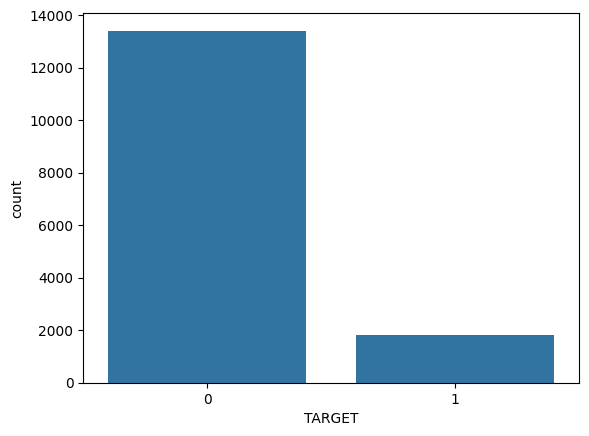

In [42]:
sns.countplot(x='TARGET',data=df)

Видим, что классы целевой переменной несбалансированные

In [43]:
df['TARGET'].value_counts(normalize=True) * 100

0    88.096959
1    11.903041
Name: TARGET, dtype: float64

Мы видим смещение в сторону класса 1.

* При несбалансированных классах модели могут склоняться к тому классу, который имеет большее количество объектов. В результате модель может показать низкую производительность на меньшем классе.
* Если классы не сбалансированы, то модель может легко переобучаться на обучающих данных, демонстрируя высокую точность на обучающих данных и низкую производительность на новых данных.
* Несбалансированная целевая переменная может привести к снижению общей точности модели.

<Axes: xlabel='TARGET', ylabel='Count'>

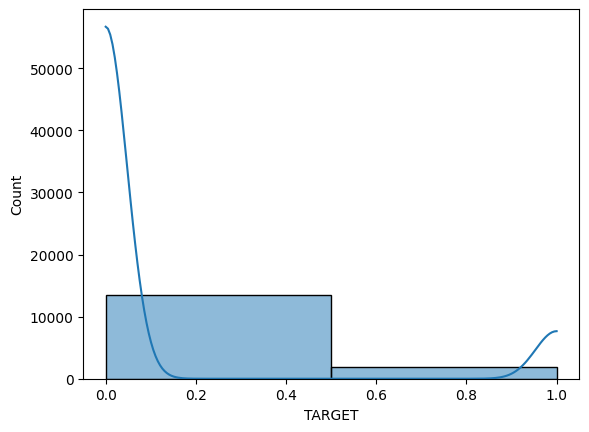

In [44]:
sns.histplot(data = df['TARGET'], kde = True, bins = 2)

### **Однофакторный анализ**

#### Возраст клиента

Проведем однофакторный анализ возраста клиента

In [45]:
df['AGE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15223 entries, 0 to 15222
Series name: AGE
Non-Null Count  Dtype
--------------  -----
15223 non-null  int64
dtypes: int64(1)
memory usage: 119.1 KB


In [46]:
df['AGE'].sort_values().unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67], dtype=int64)

Заметим, что в датасете содержится информация о клиентах в возрасте 21-67 лет. Данные представлены целыми числами

(array([305., 817., 430., 965., 414., 887., 461., 896., 455., 818., 420.,
        844., 406., 736., 335., 721., 633., 358., 700., 349., 688., 295.,
        623., 283., 492., 206., 360., 138., 170.,  18.]),
 array([21.        , 22.53333333, 24.06666667, 25.6       , 27.13333333,
        28.66666667, 30.2       , 31.73333333, 33.26666667, 34.8       ,
        36.33333333, 37.86666667, 39.4       , 40.93333333, 42.46666667,
        44.        , 45.53333333, 47.06666667, 48.6       , 50.13333333,
        51.66666667, 53.2       , 54.73333333, 56.26666667, 57.8       ,
        59.33333333, 60.86666667, 62.4       , 63.93333333, 65.46666667,
        67.        ]),
 <BarContainer object of 30 artists>)

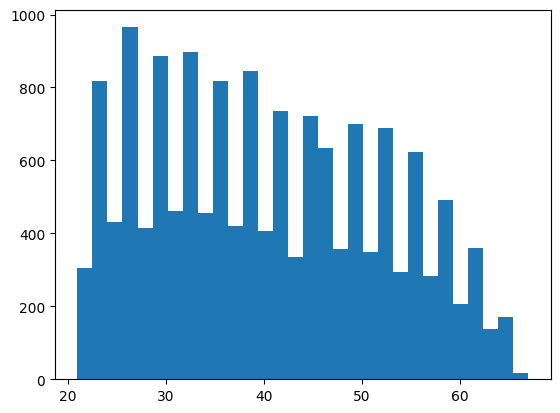

In [47]:
plt.hist(df['AGE'], bins=30)

<Axes: xlabel='AGE', ylabel='Density'>

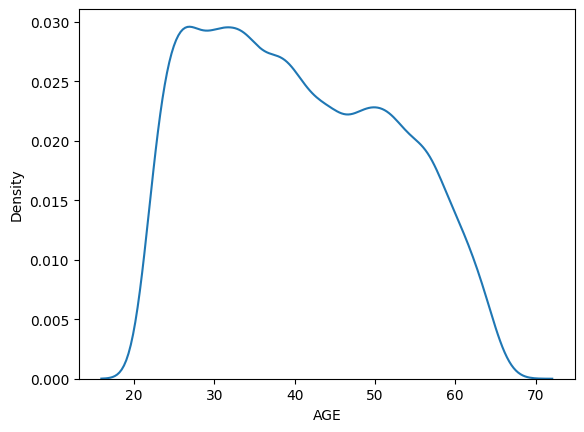

In [48]:
sns.kdeplot(df['AGE'])

Из распределения переменной мы видим, что большинство клиентов банка находятся в возрасте 25-40 лет.

In [49]:
df['AGE'].value_counts(sort=True)

27    485
26    480
31    461
33    461
30    460
34    455
35    442
24    437
32    435
25    430
38    429
29    427
37    420
39    415
28    414
40    406
23    380
36    376
42    373
44    363
41    363
45    358
48    358
50    352
51    349
52    349
49    348
53    339
43    335
56    334
47    320
46    313
54    295
22    292
55    289
57    283
58    276
59    216
61    212
60    206
62    148
63    138
64    127
65     43
66     17
21     13
67      1
Name: AGE, dtype: int64

Данная таблица подтверждает наше предположение

**Посмотрим, как возраст клиента влияет на его отклик**

<Axes: xlabel='AGE', ylabel='count'>

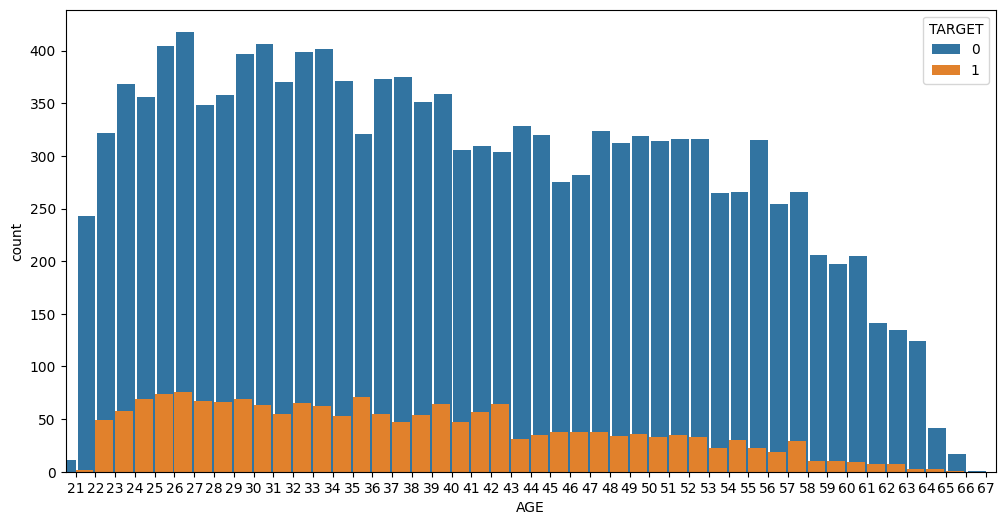

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='AGE', hue='TARGET', data=df, width = 1.8)

In [51]:
pd.crosstab(df['AGE'], df['TARGET'], normalize='index') * 100

TARGET,0,1
AGE,,
21,84.615385,15.384615
22,83.219178,16.780822
23,84.736842,15.263158
24,84.210526,15.789474
25,82.790698,17.209302
26,84.166667,15.833333
27,86.185567,13.814433
28,84.057971,15.942029
29,83.840749,16.159251


Из кросс-таблицы и графика зависимости переменной и таргета можно сделать вывод, что люди старше 55 лет почти никогда не откликались на предложения банка. Лучше всего откликались 42-летние и 25-летние люди.

Тяжело сделать вывод о какой-то явной зависимости между возрастом и откликом клиента

#### Пол клиента

Проведем однофакторный анализ пола клиента

In [52]:
df['GENDER'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15223 entries, 0 to 15222
Series name: GENDER
Non-Null Count  Dtype
--------------  -----
15223 non-null  int64
dtypes: int64(1)
memory usage: 119.1 KB


GENDER — пол клиента (1 — мужчина, 0 — женщина). Переменная по факту является категориальной, но выражается в целых числах

<Axes: xlabel='GENDER', ylabel='count'>

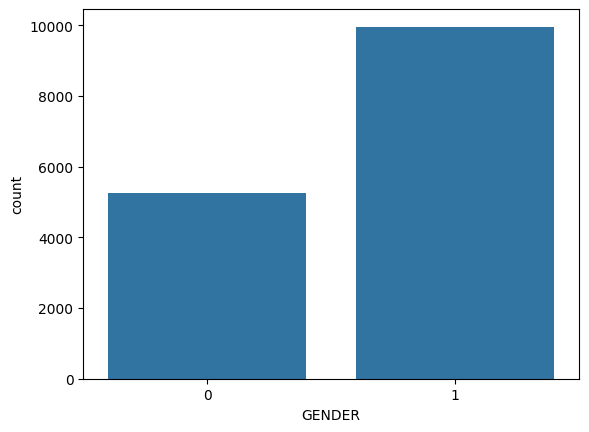

In [53]:
sns.countplot(x='GENDER',data=df)

Мы видим, что эти классы не сбалансированы. Мужчин в датасете больше.

In [54]:
df['GENDER'].value_counts(normalize=True) * 100

1    65.45359
0    34.54641
Name: GENDER, dtype: float64

<Axes: xlabel='GENDER', ylabel='Count'>

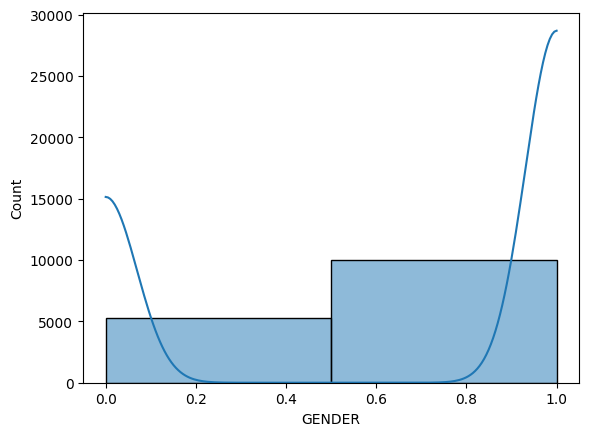

In [55]:
sns.histplot(data = df['GENDER'], kde = True, bins = 2)

**Посмотрим как пол влияет на отклик клиента**

<Axes: xlabel='GENDER', ylabel='count'>

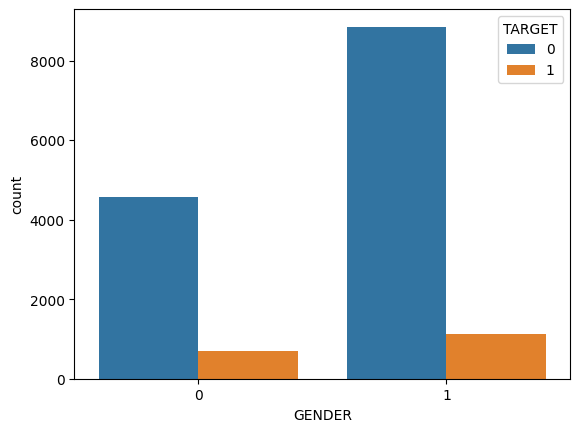

In [56]:
sns.countplot(x='GENDER', hue='TARGET', data=df, width = 0.8)

In [57]:
pd.crosstab(df['GENDER'], df['TARGET'], normalize='index') * 100

TARGET,0,1
GENDER,,
0,86.727515,13.272485
1,88.819751,11.180249


Из графика зависимости и кросс-таблицы мы видим, что женщины охотнее откликаются на банковские предложения, чем мужчины (не намного, на 2%).

Тяжело сделать вывод о какой-то явной зависимости между полом и откликом клиента

#### Социальный статус относительно работы

Проведем однофакторный анализ социального статуса клиента относительно работы

In [58]:
df['SOCSTATUS_WORK_FL'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15223 entries, 0 to 15222
Series name: SOCSTATUS_WORK_FL
Non-Null Count  Dtype
--------------  -----
15223 non-null  int64
dtypes: int64(1)
memory usage: 119.1 KB


SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает). Переменная по факту является категориальной, но выражается в целых числах

<Axes: xlabel='SOCSTATUS_WORK_FL', ylabel='count'>

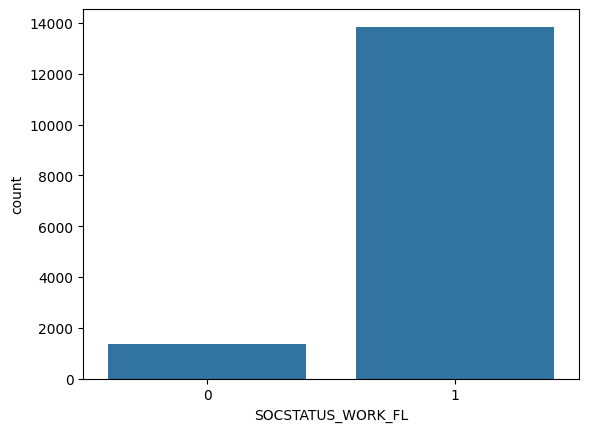

In [59]:
sns.countplot(x='SOCSTATUS_WORK_FL',data=df)

Мы видим, что эти классы очень не сбалансированы. Работающих людей в датасете больше, что логично

In [60]:
df['SOCSTATUS_WORK_FL'].value_counts(normalize=True) * 100

1    90.961046
0     9.038954
Name: SOCSTATUS_WORK_FL, dtype: float64

<Axes: xlabel='SOCSTATUS_WORK_FL', ylabel='Count'>

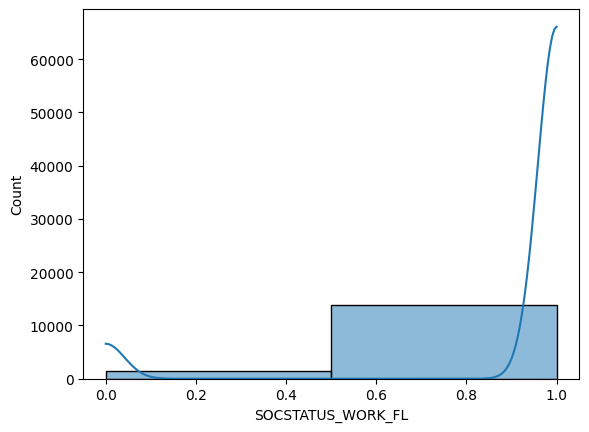

In [61]:
sns.histplot(data = df['SOCSTATUS_WORK_FL'], kde = True, bins = 2)

**Посмотрим как работа влияет на отклик клиента**

<Axes: xlabel='SOCSTATUS_WORK_FL', ylabel='count'>

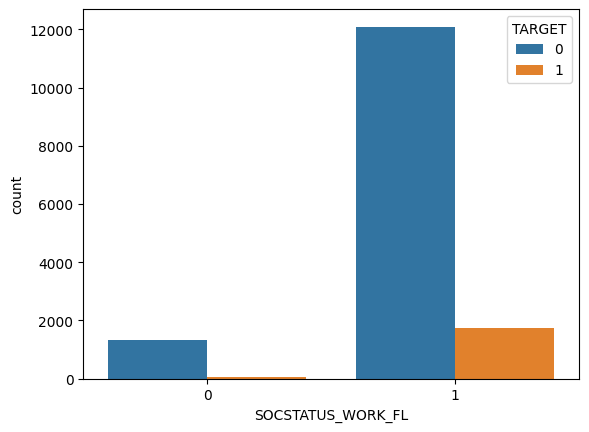

In [62]:
sns.countplot(x='SOCSTATUS_WORK_FL', hue='TARGET', data=df, width = 0.8)

In [63]:
pd.crosstab(df['SOCSTATUS_WORK_FL'], df['TARGET'], normalize='index') * 100

TARGET,0,1
SOCSTATUS_WORK_FL,,
0,96.148256,3.851744
1,87.296887,12.703113


Из графика зависимости и кросс-таблицы мы видим, что работающие люди охотнее откликаются на предложения банка.

Мы можем сделать вывод, что существует некоторая зависимость между работой клиента и его склонности к отклику

#### Личный доход клиента

Проведем однофакторный анализ личного дохода клиента

In [64]:
df['PERSONAL_INCOME'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15223 entries, 0 to 15222
Series name: PERSONAL_INCOME
Non-Null Count  Dtype  
--------------  -----  
15223 non-null  float64
dtypes: float64(1)
memory usage: 119.1 KB


In [65]:
df['PERSONAL_INCOME'].max()

250000.0

In [66]:
df['PERSONAL_INCOME'].min()

24.0

In [67]:
df['PERSONAL_INCOME'].mean()

13853.836323326545

In [68]:
df['PERSONAL_INCOME'].median()

12000.0

Заметим, что в датасете содержится информация о клиентах с доходом 24 - 250 000 рублей. Данные представлены вещественными числами

(array([8.424e+03, 5.783e+03, 7.340e+02, 2.260e+02, 2.700e+01, 1.000e+01,
        5.000e+00, 6.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([2.400000e+01, 1.252280e+04, 2.502160e+04, 3.752040e+04,
        5.001920e+04, 6.251800e+04, 7.501680e+04, 8.751560e+04,
        1.000144e+05, 1.125132e+05, 1.250120e+05, 1.375108e+05,
        1.500096e+05, 1.625084e+05, 1.750072e+05, 1.875060e+05,
        2.000048e+05, 2.125036e+05, 2.250024e+05, 2.375012e+05,
        2.500000e+05]),
 <BarContainer object of 20 artists>)

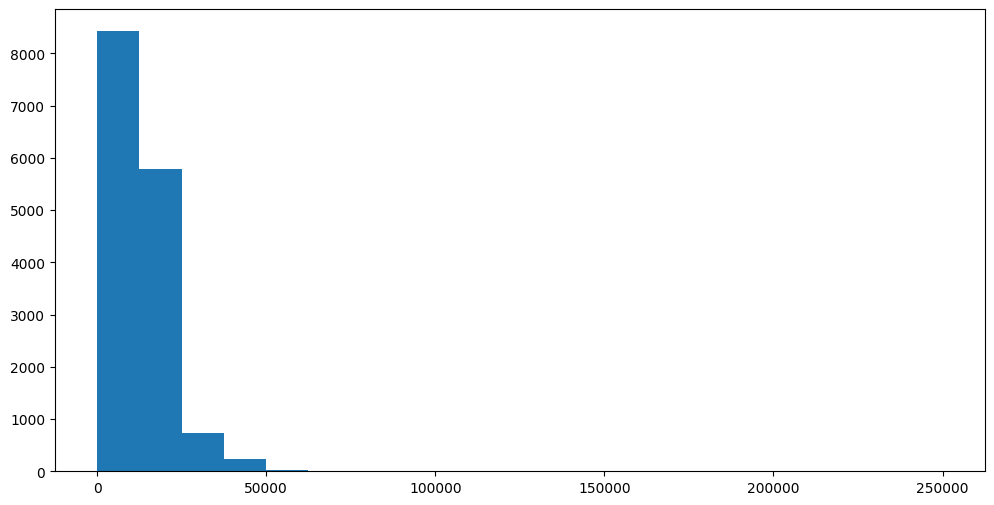

In [69]:
plt.figure(figsize=(12, 6))
plt.hist(df['PERSONAL_INCOME'], bins=20)

<Axes: xlabel='PERSONAL_INCOME', ylabel='Density'>

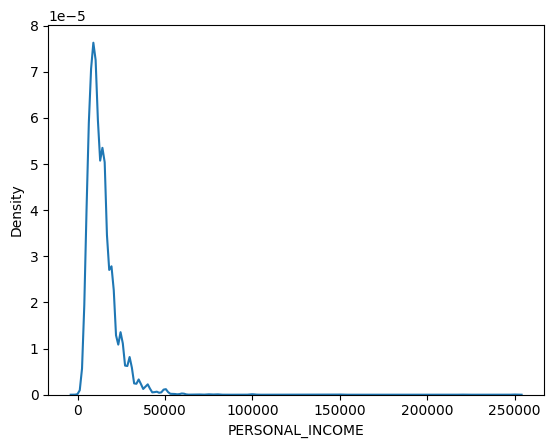

In [70]:
sns.kdeplot(df['PERSONAL_INCOME'])

Из распределения переменной мы видим, что распределение личного дохода до 50 000 рублей близко к нормальному, но после этой суммы график имеет хвост

In [71]:
(df['PERSONAL_INCOME'] < 50000).sum()

15105

In [72]:
(df['PERSONAL_INCOME'] >= 50000).sum()

118

<Axes: xlabel='PERSONAL_INCOME', ylabel='Density'>

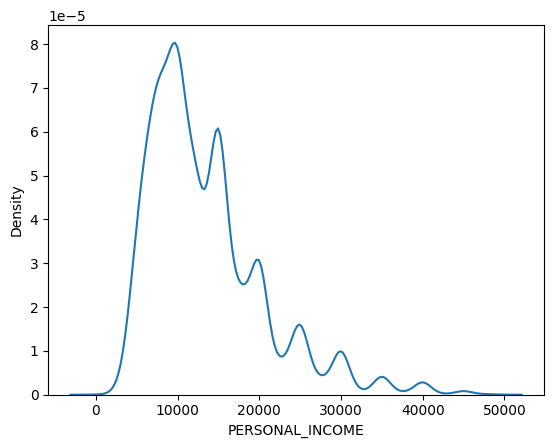

In [73]:
filtered_data = df[df['PERSONAL_INCOME'] < 50000]
sns.kdeplot(filtered_data['PERSONAL_INCOME'])

Видим, что наше предположение о нормальности неверно. Но мы были правы, когда говорили о хвосте в графике

**Посмотрим, как доход клиента влияет на его отклик**

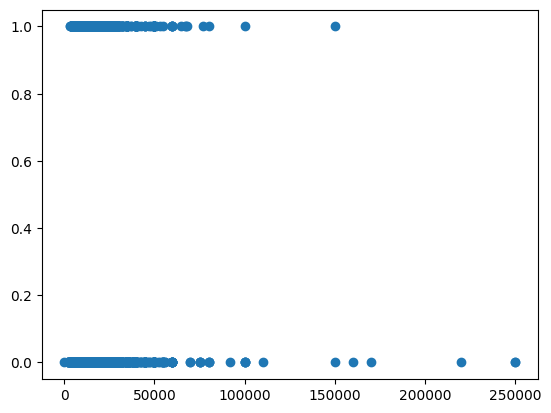

In [74]:
plt.scatter(df['PERSONAL_INCOME'], df['TARGET'])

Из графика зависимости переменной и таргета можно сделать вывод, что люди с доходом больше 50 000 хуже откликаются на предложения банка

Тяжело сделать вывод о какой-то явной зависимости между возрастом и откликом клиента

#### Наличие квартиры

Проведем однофакторный анализ наличия у клиента квартиры

In [75]:
df['FL_PRESENCE_FL'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15223 entries, 0 to 15222
Series name: FL_PRESENCE_FL
Non-Null Count  Dtype
--------------  -----
15223 non-null  int64
dtypes: int64(1)
memory usage: 119.1 KB


FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет). Переменная по факту является категориальной, но выражается в целых числах

<Axes: xlabel='FL_PRESENCE_FL', ylabel='count'>

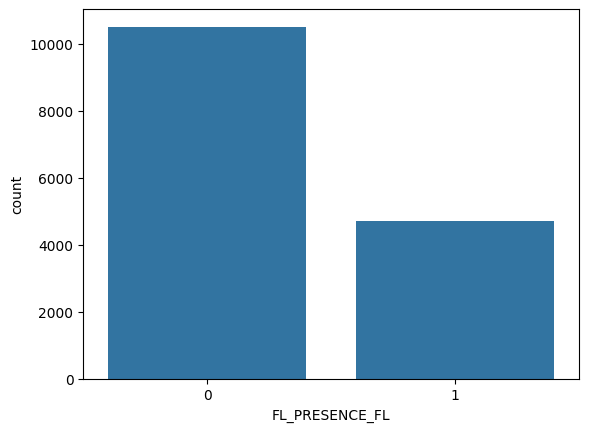

In [76]:
sns.countplot(x='FL_PRESENCE_FL',data=df)

Мы видим, что эти классы очень не сбалансированы. Людей с квартирами в датасете меньше

In [77]:
df['FL_PRESENCE_FL'].value_counts(normalize=True) * 100

0    69.020561
1    30.979439
Name: FL_PRESENCE_FL, dtype: float64

<Axes: xlabel='FL_PRESENCE_FL', ylabel='Count'>

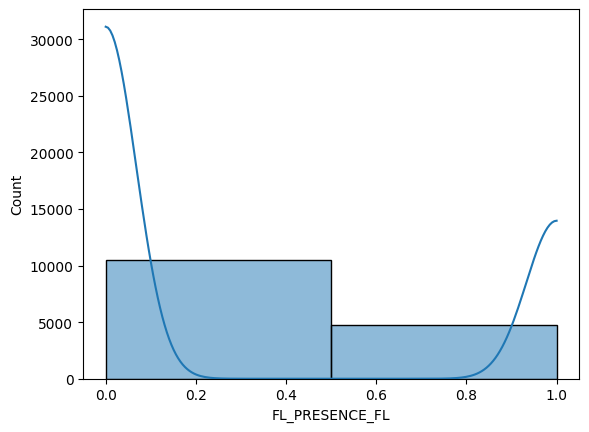

In [78]:
sns.histplot(data = df['FL_PRESENCE_FL'], kde = True, bins = 2)

**Посмотрим как квартира влияет на отклик клиента**

<Axes: xlabel='FL_PRESENCE_FL', ylabel='count'>

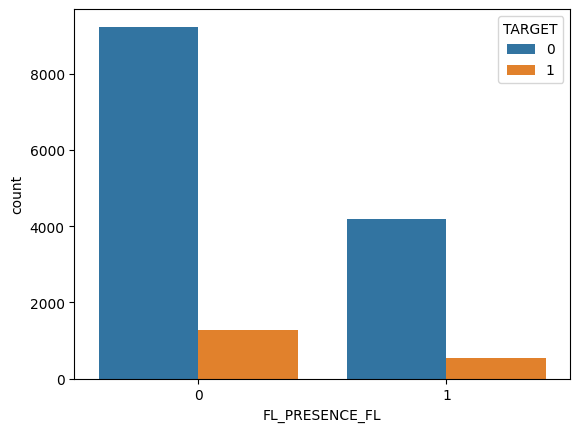

In [79]:
sns.countplot(x='FL_PRESENCE_FL', hue='TARGET', data=df, width = 0.8)

In [80]:
pd.crosstab(df['FL_PRESENCE_FL'], df['TARGET'], normalize='index') * 100

TARGET,0,1
FL_PRESENCE_FL,,
0,87.827163,12.172837
1,88.698049,11.301951


Из графика зависимости и кросс-таблицы мы видим, что люди с квартирами охотнее откликаются на предложения банка (не намного, менее, чем на 1%)

Мы не можем сделать вывод, что существует некоторая зависимость между наличием квартиры и склонностью к отклику.

#### Количество автомобилей

Проведем однофакторный анализ наличия у клиента автомобилей

In [81]:
df['OWN_AUTO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15223 entries, 0 to 15222
Series name: OWN_AUTO
Non-Null Count  Dtype
--------------  -----
15223 non-null  int64
dtypes: int64(1)
memory usage: 119.1 KB


In [82]:
df['OWN_AUTO'].max()

2

In [83]:
df['OWN_AUTO'].unique()

array([0, 1, 2], dtype=int64)

OWN_AUTO — количество автомобилей в собственности. Максимальное количество автомобилей у клиента - 2, минимальное - 0 автомобилей.

<Axes: xlabel='OWN_AUTO', ylabel='count'>

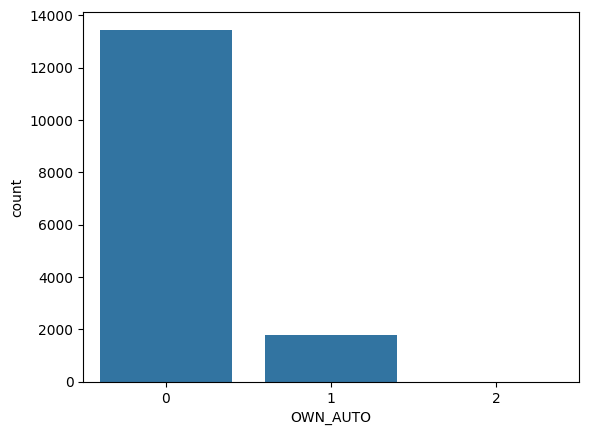

In [84]:
sns.countplot(x='OWN_AUTO',data=df)

In [85]:
df['OWN_AUTO'].value_counts()

0    13453
1     1769
2        1
Name: OWN_AUTO, dtype: int64

Мы видим, что классы очень не сбалансированы. Больше всего клиентов не имеют машин, гораздо меньше людей имеет одну машину, один клиент имеет две машины

**Посмотрим как наличие машин влияет на отклик клиента**

<Axes: xlabel='OWN_AUTO', ylabel='count'>

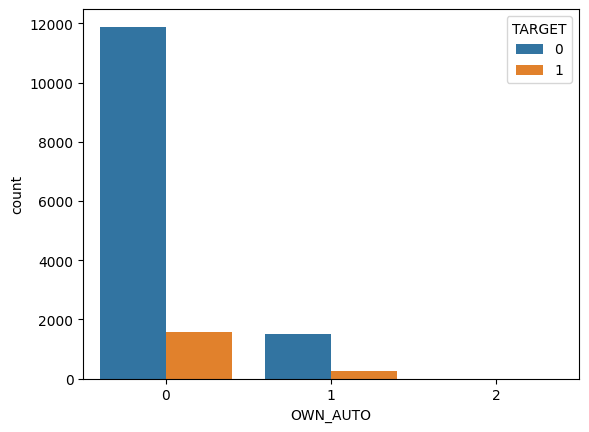

In [86]:
sns.countplot(x='OWN_AUTO', hue='TARGET', data=df, width = 0.8)

In [87]:
pd.crosstab(df['OWN_AUTO'], df['TARGET'], normalize='index') * 100

TARGET,0,1
OWN_AUTO,,
0,88.344607,11.655393
1,86.206897,13.793103
2,100.000000,0.000000


Из графика зависимости и кросс-таблицы мы видим, что люди с одной машиной охотнее откликаются на предложения банка (не намного, на 2%). Человек с двумя машинами на предложение не откликнулся.

Мы не можем сделать вывод, что существует некоторая зависимость между наличием машин и склонностью к отклику.

#### Количество погашенных ссуд клиента

Проведем однофакторный анализ количества погашенных ссуд клиента

In [88]:
df['LOAN_NUM_CLOSED'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15223 entries, 0 to 15222
Series name: LOAN_NUM_CLOSED
Non-Null Count  Dtype
--------------  -----
15223 non-null  int64
dtypes: int64(1)
memory usage: 119.1 KB


In [89]:
df['LOAN_NUM_CLOSED'].max()

11

In [90]:
df['LOAN_NUM_CLOSED'].unique()

array([ 0,  1,  2,  3,  4,  6,  5,  7,  8, 11], dtype=int64)

LOAN_NUM_CLOSED — количество погашенных ссуд клиента. Максимальное количество таких ссуд - 11, минимальное - 0.

<Axes: xlabel='LOAN_NUM_CLOSED', ylabel='count'>

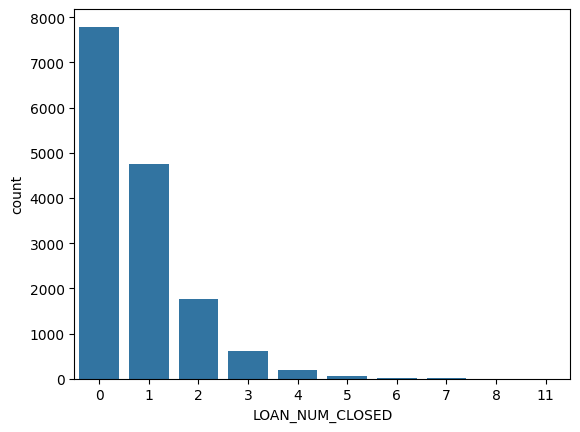

In [91]:
sns.countplot(x='LOAN_NUM_CLOSED',data=df)

In [92]:
df['LOAN_NUM_CLOSED'].value_counts()

0     7791
1     4761
2     1770
3      603
4      202
5       62
6       26
7        5
8        2
11       1
Name: LOAN_NUM_CLOSED, dtype: int64

Мы видим, что классы очень не сбалансированы. Больше всего клиентов не имеют погашенных кредитов или имеют 1 погашенный кредит. Меньше всего клиентов имеют больше 5 погашенных кредитов.

**Посмотрим как количество погашенных клиентов влияет на отклик клиента**

<Axes: xlabel='LOAN_NUM_CLOSED', ylabel='count'>

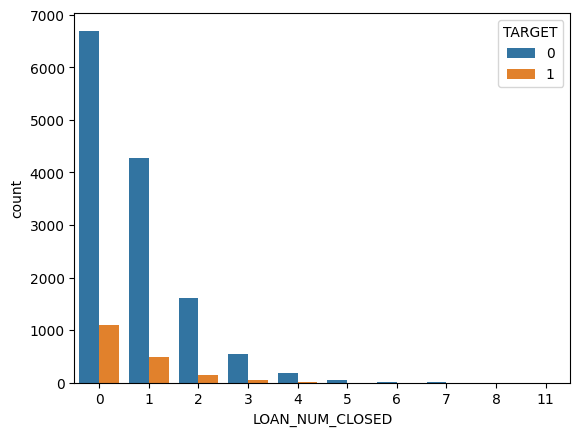

In [93]:
sns.countplot(x='LOAN_NUM_CLOSED', hue='TARGET', data=df, width = 0.8)

In [94]:
pd.crosstab(df['LOAN_NUM_CLOSED'], df['TARGET'], normalize='index') * 100

TARGET,0,1
LOAN_NUM_CLOSED,,
0,85.958157,14.041843
1,89.729049,10.270951
2,91.186441,8.813559
3,92.039801,7.960199
4,91.089109,8.910891
5,95.161290,4.838710
6,88.461538,11.538462
7,100.000000,0.000000
8,50.000000,50.000000


Из графика зависимости и кросс-таблицы мы видим, что люди без закрытых кредитов охотнее откликаются на предложения банка.

Мы не можем сделать вывод, что существует некоторая зависимость между наличием машин и склонностью к отклику.

### **Матрицы корреляций**

#### Корреляция Пирсона

Корреляция Пирсона лучше работает с линейными связями между переменными. Она чувствительна к выбросам

<Axes: >

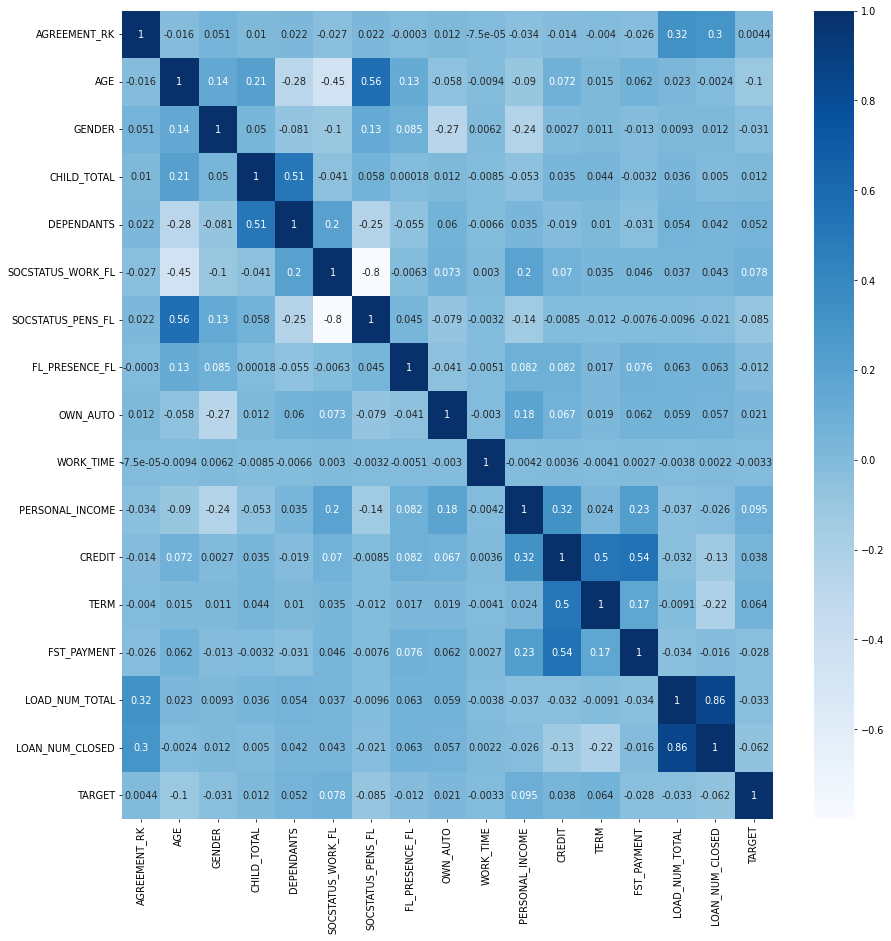

In [95]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15), dpi=70)
sns.heatmap(corr, cmap="Blues", annot=True, ax=ax)

#### Корреляция Спирмана

Корреляция Спирмена позволяет выявлять различные типы монотонных связей, в том числе и нелинейные. Более устойчива к воздействию выбросов. Может использоваться для порядковых переменных.

<Axes: >

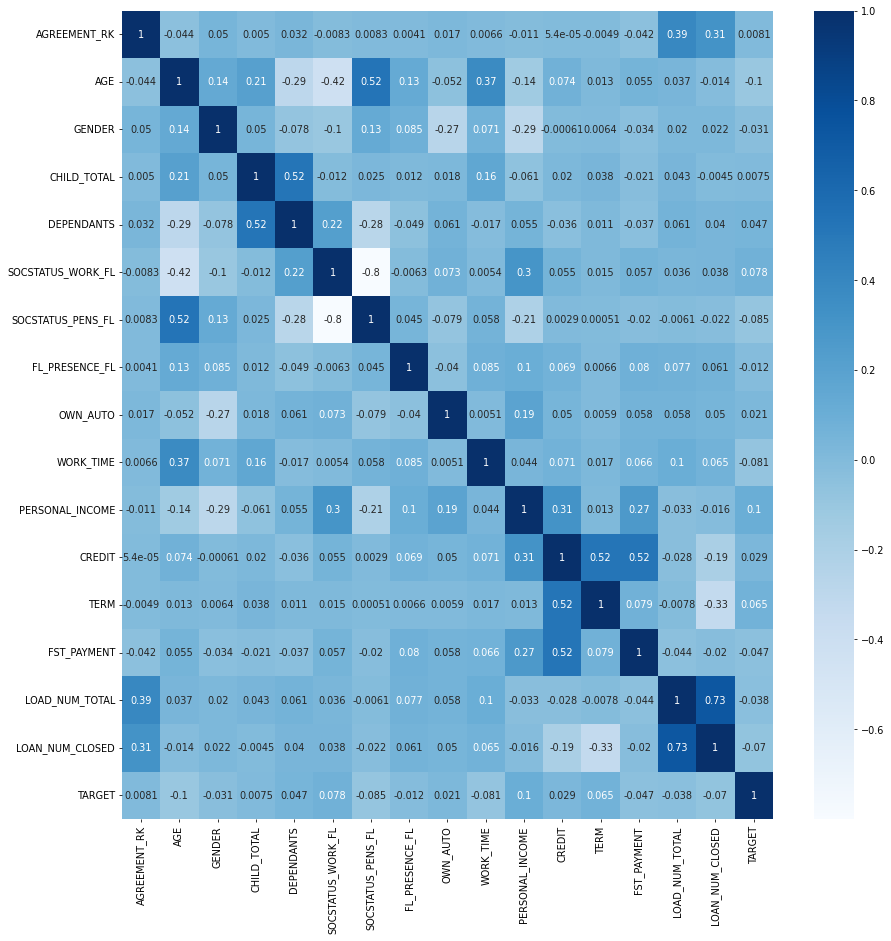

In [96]:
corr = df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15, 15), dpi=70)
sns.heatmap(corr, cmap="Blues", annot=True, ax=ax)

На данной тепловой карте мы видим высокую корреляцию между LOAN_NUM_TOTAL и LOAD_NUM_CLOSED (0.73), между CREDIT и FST_PAYMENT (0.52), между CREDIT и TERM (0.52), между SOCSTATUS_PENS_FL и AGE (0.52), между DEPENDANTS и CHILD_TOTAL (0.52)

### **Статистические тесты**

#### **Тест Хи-квадрат**

Хи-квадрат (χ²) - это статистический тест, который используется для определения наличия или отсутствия статистически значимой связи между двумя или более категориальными переменными.

##### TARGET и SOCSTATUS_WORK_FL

In [97]:
cont_table = pd.crosstab(df['TARGET'], df['SOCSTATUS_WORK_FL'])

chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)

print("Хи-квадрат статистика:", chi2)
print("p-значение:", p_val)
print("Степени свободы:", dof)
print("Ожидаемые частоты:", expected)

Хи-квадрат статистика: 92.67164080054187
p-значение: 6.17318523660736e-22
Степени свободы: 1
Ожидаемые частоты: [[ 1212.21414964 12198.78585036]
 [  163.78585036  1648.21414964]]


P-значение является мерой того, насколько вероятно получить такое или более экстремальное значение статистики, при условии, что нулевая гипотеза верна. В данном случае, очень маленькое p-значение (6.173185236607358e-22) говорит о том, что существует очень маленькая вероятность получить такую же или более экстремальную статистику, если нулевая гипотеза о независимости переменных верна. Это позволяет нам отвергнуть нулевую гипотезу и сделать вывод о наличии статистически значимой зависимости между категориальными переменными.

##### TARGET и GENDER

In [98]:
cont_table = pd.crosstab(df['TARGET'], df['GENDER'])

chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)

print("Хи-квадрат статистика:", chi2)
print("p-значение:", p_val)
print("Степени свободы:", dof)
print("Ожидаемые частоты:", expected)

Хи-квадрат статистика: 14.170591286007642
p-значение: 0.00016695976077290062
Степени свободы: 1
Ожидаемые частоты: [[4633.01905012 8777.98094988]
 [ 625.98094988 1186.01905012]]


В данном случае, очень низкое p-значение указывает на то, что нулевая гипотеза может быть отвергнута, и есть статистически значимые доказательства в пользу существования взаимосвязи между переменными.

##### TARGET и SOCSTATUS_PENS_FL

In [99]:
cont_table = pd.crosstab(df['TARGET'], df['SOCSTATUS_PENS_FL'])

chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)

print("Хи-квадрат статистика:", chi2)
print("p-значение:", p_val)
print("Степени свободы:", dof)
print("Ожидаемые частоты:", expected)

Хи-квадрат статистика: 108.76917043149088
p-значение: 1.8232950282263292e-25
Степени свободы: 1
Ожидаемые частоты: [[11607.65525849  1803.34474151]
 [ 1568.34474151   243.65525849]]


Малое p-значение (в данном случае очень близкое к нулю) указывает на то, что отличия между наблюдаемыми и ожидаемыми частотами статистически значимы.

##### TARGET и FL_PRESENCE_FL

In [100]:
cont_table = pd.crosstab(df['TARGET'], df['FL_PRESENCE_FL'])

chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)

print("Хи-квадрат статистика:", chi2)
print("p-значение:", p_val)
print("Степени свободы:", dof)
print("Ожидаемые частоты:", expected)

Хи-квадрат статистика: 2.271952510398382
p-значение: 0.13173384385967044
Степени свободы: 1
Ожидаемые частоты: [[9256.3474348 4154.6525652]
 [1250.6525652  561.3474348]]


Эти результаты говорят о том, что существует некоторая связь между переменными или группами, которые были анализированы. Однако, p-значение в данном случае превышает стандартный уровень значимости 0.05, что означает, что различия между группами не являются статистически значимыми

#### **Тест Манна-Уитни**

Тест Манна-Уитни (или U-тест) - это непараметрический статистический тест, который используется для сравнения средних значений двух независимых выборок. Он широко применяется в случаях, когда данные не соответствуют требованиям для применения параметрического теста, например, когда данные имеют не нормальное распределение или содержат выбросы.

##### TARGET и FST_PAYMENT

In [101]:
statistic, p_value = mannwhitneyu(df[df['TARGET'] == 0]['FST_PAYMENT'], df[df['TARGET'] == 1]['FST_PAYMENT'])

print('Statistics:', statistic)
print('P-value:', p_value)

Statistics: 13169125.5
P-value: 6.39269792831802e-09


В данном случае, p-значение указывает на то, что существует статистически значимая связь или различие между наблюдаемыми данными.

##### TARGET и PERSONAL_INCOME

In [102]:
statistic, p_value = mannwhitneyu(df[df['TARGET'] == 0]['PERSONAL_INCOME'], df[df['TARGET'] == 1]['PERSONAL_INCOME'])

print('Statistics:', statistic)
print('P-value:', p_value)

Statistics: 9976954.0
P-value: 2.443684721988716e-35


В данном случае, p-значение указывает на то, что существует статистически значимая связь или различие между наблюдаемыми данными.

### **Классификация**

In [126]:
columns_to_use = ['AGREEMENT_RK', 'AGE', 'GENDER', 'EDUCATION',
                      'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS',
                      'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'OWN_AUTO',
                      'FL_PRESENCE_FL', 'FAMILY_INCOME', 'PERSONAL_INCOME',
                      'CREDIT', 'LOAD_NUM_TOTAL',
                      'LOAN_NUM_CLOSED', 'TARGET']
df = df[columns_to_use]
df = pd.get_dummies(df, drop_first=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.to_csv('df.csv', index=False)

In [128]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

#### Логистическая регрессия без подбора гиперпараметров

In [129]:
lr0 = LogisticRegression()
lr0.fit(Xtrain, ytrain)
pred_test = lr0.predict(Xtest)

Калибровка вероятностей

In [132]:
threshold = 0.11
probs = lr0.predict_proba(Xtest)
probs_churn = probs[:, 1]
classes = probs_churn > threshold
accuracy = accuracy_score(ytest, classes)
precision = precision_score(ytest, classes)
recall = recall_score(ytest, classes)
f1 = f1_score(ytest, classes)
roc_auc = roc_auc_score(ytest, classes)

data = {
            'Метрика': ['Accuracy', 'Precision (точность)', 'Recall (полнота)', 'F1-score', 'ROC-AUC'],
            'Значение': [accuracy, precision, recall, f1, roc_auc]
        }
table_lr0 = pd.DataFrame(data)

In [133]:
table_lr0

,Метрика,Значение
0,Accuracy,0.519869
1,Precision (точность),0.145501
2,Recall (полнота),0.649573
3,F1-score,0.237748
4,ROC-AUC,0.576271


#### Логистическая регрессия с подбором гиперпараметра регуляризации C

In [134]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'C': np.arange(0.1, 100, 0.1)}

lr1 = LogisticRegression()
grid_search = GridSearchCV(lr1, param_grid, cv=5)
grid_search.fit(Xtrain, ytrain)

best_C = grid_search.best_params_['C']
print("Best value of C:", best_C)

lr1 = LogisticRegression(C=best_C)
lr1.fit(Xtrain, ytrain)

pred_test = lr1.predict(Xtest)

Best value of C: 0.1


Калибровка вероятностей

In [135]:
from tqdm import tqdm

threshold = 0
metric = 0
for thr in tqdm(np.arange(0.1, 1, 0.001)):
    probs = lr1.predict_proba(Xtest)
    probs_churn = probs[:, 1]
    classes = probs_churn > thr
    roc_auc = roc_auc_score(ytest, classes)
    if roc_auc > metric:
        metric = roc_auc
        threshold = thr

100%|██████████| 900/900 [00:02<00:00, 302.99it/s]


In [136]:
threshold

0.13500000000000004

In [137]:
probs = lr1.predict_proba(Xtest)
probs_churn = probs[:, 1]
classes = probs_churn > threshold
accuracy = accuracy_score(ytest, classes)
precision = precision_score(ytest, classes)
recall = recall_score(ytest, classes)
f1 = f1_score(ytest, classes)
roc_auc = roc_auc_score(ytest, classes)

data = {
            'Метрика': ['Accuracy', 'Precision (точность)', 'Recall (полнота)', 'F1-score', 'ROC-AUC'],
            'Значение': [accuracy, precision, recall, f1, roc_auc]
        }
table_lr1 = pd.DataFrame(data)

In [138]:
table_lr1

,Метрика,Значение
0,Accuracy,0.660755
1,Precision (точность),0.170849
2,Recall (полнота),0.504274
3,F1-score,0.255227
4,ROC-AUC,0.592708


Видим, что нам удалось улучшить качество логистической регрессии.

#### Метод опорных векторов с подбором гиперпараметра регуляризации C

In [145]:
from sklearn import svm

In [148]:
param_grid = {'C': np.arange(0.1, 100, 0.1)}

svc = svm.SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(Xtrain, ytrain)

best_C = grid_search.best_params_['C']
print("Best value of C:", best_C)

Best value of C: 0.1


In [151]:
svc = svm.SVC(C=0.1, probability=True)
svc.fit(Xtrain, ytrain)

pred_test = svc.predict(Xtest)

Калибровка вероятностей

In [152]:
threshold = 0
metric = 0
for thr in tqdm(np.arange(0.1, 1, 0.001)):
    probs = svc.predict_proba(Xtest)
    probs_churn = probs[:, 1]
    classes = probs_churn > thr
    roc_auc = roc_auc_score(ytest, classes)
    if roc_auc > metric:
        metric = roc_auc
        threshold = thr

100%|██████████| 900/900 [19:02<00:00,  1.27s/it]


In [153]:
threshold

0.12000000000000002

In [154]:
probs = svc.predict_proba(Xtest)
probs_churn = probs[:, 1]
classes = probs_churn > threshold
accuracy = accuracy_score(ytest, classes)
precision = precision_score(ytest, classes)
recall = recall_score(ytest, classes)
f1 = f1_score(ytest, classes)
roc_auc = roc_auc_score(ytest, classes)

data = {
            'Метрика': ['Accuracy', 'Precision (точность)', 'Recall (полнота)', 'F1-score', 'ROC-AUC'],
            'Значение': [accuracy, precision, recall, f1, roc_auc]
        }
table_svc = pd.DataFrame(data)

In [155]:
table_svc

,Метрика,Значение
0,Accuracy,0.726765
1,Precision (точность),0.156919
2,Recall (полнота),0.313390
3,F1-score,0.209125
4,ROC-AUC,0.547007


Видим, что удалось увеличить accuracy, но при этом уменьшился roc-auc

#### Ядровой SVM с подбором гиперпараметров (ядро и другие)

In [169]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001]
}

svc1 = svm.SVC()
grid_search = GridSearchCV(svc1, param_grid, cv=5, n_jobs=-1)
grid_search.fit(Xtrain, ytrain)

print("Best hyperparameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Best hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best CV score: 0.880029570137196


In [170]:
svc1 = svm.SVC(**grid_search.best_params_, probability=True)
svc1.fit(Xtrain, ytrain)

pred_test = svc1.predict(Xtest)

Калибровка вероятностей

In [171]:
threshold = 0
metric = 0
for thr in tqdm(np.arange(0.1, 1, 0.001)):
    probs = svc1.predict_proba(Xtest)
    probs_churn = probs[:, 1]
    classes = probs_churn > thr
    roc_auc = roc_auc_score(ytest, classes)
    if roc_auc > metric:
        metric = roc_auc
        threshold = thr

100%|██████████| 900/900 [02:56<00:00,  5.10it/s]


In [172]:
threshold

0.12200000000000003

In [173]:
probs = svc1.predict_proba(Xtest)
probs_churn = probs[:, 1]
classes = probs_churn > threshold
accuracy = accuracy_score(ytest, classes)
precision = precision_score(ytest, classes)
recall = recall_score(ytest, classes)
f1 = f1_score(ytest, classes)
roc_auc = roc_auc_score(ytest, classes)

data = {
            'Метрика': ['Accuracy', 'Precision (точность)', 'Recall (полнота)', 'F1-score', 'ROC-AUC'],
            'Значение': [accuracy, precision, recall, f1, roc_auc]
        }
table_svc1 = pd.DataFrame(data)

In [174]:
table_svc1

,Метрика,Значение
0,Accuracy,0.621018
1,Precision (точность),0.117255
2,Recall (полнота),0.350427
3,F1-score,0.175714
4,ROC-AUC,0.503350


Видим, что значения метрик ухудшились.